In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from lightgbm import LGBMClassifier
import sys
sys.path.append("..")
from cloud.eval.io.load_dataset import load_dataset
from sklearn.model_selection import cross_val_score
from gecs100.gec import GEC
from gecs100.utils.gaussian_process_visualisation import visualise_1D_gaussian_process, visualise_2D_gaussian_process



In [2]:
gec = GEC()
np.random.seed(int(datetime.now().timestamp() % 1 * 1e7))
#gec.load_gp_datas("./gp_datas.json")
X, y = load_dataset("cover", "../data/covtype.data")
print(X.shape)

(17181, 54)


In [3]:
#pd.DataFrame(list(zip(list(X.mean(0)), list(np.std(X, axis=0)), list(X.max(0)), list(X.min(0)))))

In [3]:
gec.set_gec_hyperparameters({"n_sample_initial":1000})

In [4]:
gec.gec_hyperparameters

{'l': 1.0,
 'l_bagging': 0.1,
 'hyperparams_acquisition_percentile': 0.7,
 'bagging_acquisition_percentile': 0.7,
 'bandit_greediness': 1.0,
 'n_random_exploration': 10,
 'n_sample': 1000,
 'n_sample_initial': 1000,
 'best_share': 0.2,
 'hyperparameters': ['num_leaves',
  'learning_rate',
  'n_estimators',
  'max_bin',
  'max_depth',
  'lambda_l1',
  'lambda_l2',
  'min_data_in_leaf',
  'feature_fraction'],
 'randomize': True}

In [11]:
gec.fit(X, y, 20)

 35%|███▌      | 7/20 [00:44<01:42,  7.91s/it]/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 75%|███████▌  | 15/20 [01:46<00:35,  7.03s/it]/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 80%|████████  | 16/20 [02:00<00:36,  9.17s/it]/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lb

GEC(random_state=101)

In [12]:
inputs = pd.DataFrame(gec.hyperparameter_scores["all-models"]["inputs"])
inputs

,0,1,2,3,4,5,6,7,8
0,0.105286,-0.759766,0.799805,-0.615234,-1.00,-0.239990,0.759766,0.791504,-0.296631
1,0.494629,-0.226685,-0.000000,-0.692383,0.75,-0.239990,0.340088,-0.500000,-0.142822
2,0.021057,0.866699,-1.000000,-0.000000,-1.00,-0.119995,0.140015,-0.458252,0.472412
3,0.094727,-0.573242,-0.199951,0.384521,-0.75,0.600098,0.080017,0.666504,0.626465
4,0.073669,-0.213379,-0.600098,0.615234,-1.00,-0.680176,0.099976,-0.583496,-0.824219
5,-0.958008,0.933105,-1.000000,-1.000000,0.75,-0.740234,-0.119995,0.166626,0.714355
6,0.926270,0.306641,0.600098,-0.153809,0.50,0.859863,0.720215,-0.708496,0.472412
7,0.747559,-0.933105,-1.000000,-0.076904,-1.00,-0.979980,-0.959961,-0.208374,0.714355
8,0.399902,-0.160034,-1.000000,-0.846191,0.50,0.779785,-0.020004,-0.041656,-0.978027
9,0.347412,0.799805,0.199951,0.692383,-0.25,-0.680176,0.939941,0.208374,0.846191


In [7]:
inputs

,0,1,2,3,4,5,6,7,8
0,0.105286,-0.759766,0.799805,-0.615234,-1.00,-0.239990,0.759766,0.791504,-0.296631
1,0.494629,-0.226685,-0.000000,-0.692383,0.75,-0.239990,0.340088,-0.500000,-0.142822
2,0.021057,0.866699,-1.000000,-0.000000,-1.00,-0.119995,0.140015,-0.458252,0.472412
3,0.094727,-0.573242,-0.199951,0.384521,-0.75,0.600098,0.080017,0.666504,0.626465
4,0.073669,-0.213379,-0.600098,0.615234,-1.00,-0.680176,0.099976,-0.583496,-0.824219
5,-0.958008,0.933105,-1.000000,-1.000000,0.75,-0.740234,-0.119995,0.166626,0.714355
6,0.926270,0.306641,0.600098,-0.153809,0.50,0.859863,0.720215,-0.708496,0.472412
7,0.747559,-0.933105,-1.000000,-0.076904,-1.00,-0.979980,-0.959961,-0.208374,0.714355
8,0.399902,-0.160034,-1.000000,-0.846191,0.50,0.779785,-0.020004,-0.041656,-0.978027
9,0.347412,0.799805,0.199951,0.692383,-0.25,-0.680176,0.939941,0.208374,0.846191


In [14]:
pd.DataFrame(inputs.values.dot(inputs.values.T)).sum(1)

0     -3.011594
1      2.697283
2     13.227210
3     -4.183795
4     -2.098543
5      9.241439
6     14.373804
7      2.485910
8    -24.257722
9     24.425581
10    24.916841
11     9.426327
12    11.922354
13     8.050226
14    13.228158
15     7.060281
16    15.404364
17     9.703949
18    14.534948
19    19.515382
20     0.336908
21    10.564896
22    16.206581
23    13.109964
24     5.600659
25    20.141540
26    17.640598
27     9.478864
28    10.184991
29    13.574367
30    -3.480259
31    -3.175086
32    16.409656
33    10.785300
34    17.435914
35    11.298338
36    18.114290
37     6.796388
38    -2.443392
39     6.959063
dtype: float64

In [15]:
pd.DataFrame(gec.hyperparameter_scores["all-models"]["output"])

,0
0,0.699086
1,0.750597
2,0.776207
3,0.725860
4,0.644375
5,0.663000
6,0.749316
7,0.484548
8,0.417845
9,0.829987


In [16]:
gec.best_scores_gec

{'search': 0.8355162423032514,
 'grid': 0.8278330589222334,
 'grid_from_search': 0.8312088912583496}

In [10]:
gec.best_scores_gec

{'search': 0.8299871832346956,
 'grid': 0.820034087718294,
 'grid_from_search': 0.8355162423032514}

In [16]:
gec.serialise("/home/leon/projects/100gecs/data/gec.json")

In [8]:
gec = GEC.deserialise("/home/leon/projects/100gecs/data/gec.json", X_reweighted, y_reweighted)

In [16]:
gec.fit(X_reweighted, y_reweighted, 50)

 42%|████▏     | 21/50 [00:33<00:43,  1.49s/it]/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 60%|██████    | 30/50 [00:40<00:16,  1.22it/s]/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TE

GEC(random_state=101)

In [17]:
gec.gec_iter

64

In [18]:
gec.best_params_

{'boosting': 'dart',
 'num_leaves': 155,
 'learning_rate': 0.06248442995055827,
 'n_estimators': 30,
 'max_bin': 180,
 'max_depth': 400,
 'lambda_l1': 0.016639666155303975,
 'lambda_l2': 0.3480013777905931,
 'min_data_in_leaf': 4,
 'feature_fraction': 0.13,
 'verbosity': -1}

In [19]:
gec.best_scores_gec

{'search': 0.7549463210732578,
 'grid': 0.7199710921164609,
 'grid_from_search': 0.7061967668279566}

In [20]:
print({k:(np.mean(v["output"]), np.max(v["output"]), len(v["output"])) for k, v in gec.gp_datas.items()})

{'gbdt-yes_bagging': (0.6459176638096055, 0.6941592777608597, 12), 'gbdt-no_bagging': (0.6360695240054763, 0.6726253412010644, 12), 'dart-yes_bagging': (0.6646976369909239, 0.7239314060404195, 16), 'dart-no_bagging': (0.6721613649969065, 0.7549463210732578, 16), 'rf-yes_bagging': (0.6344047455931967, 0.6892892303828035, 8)}


/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


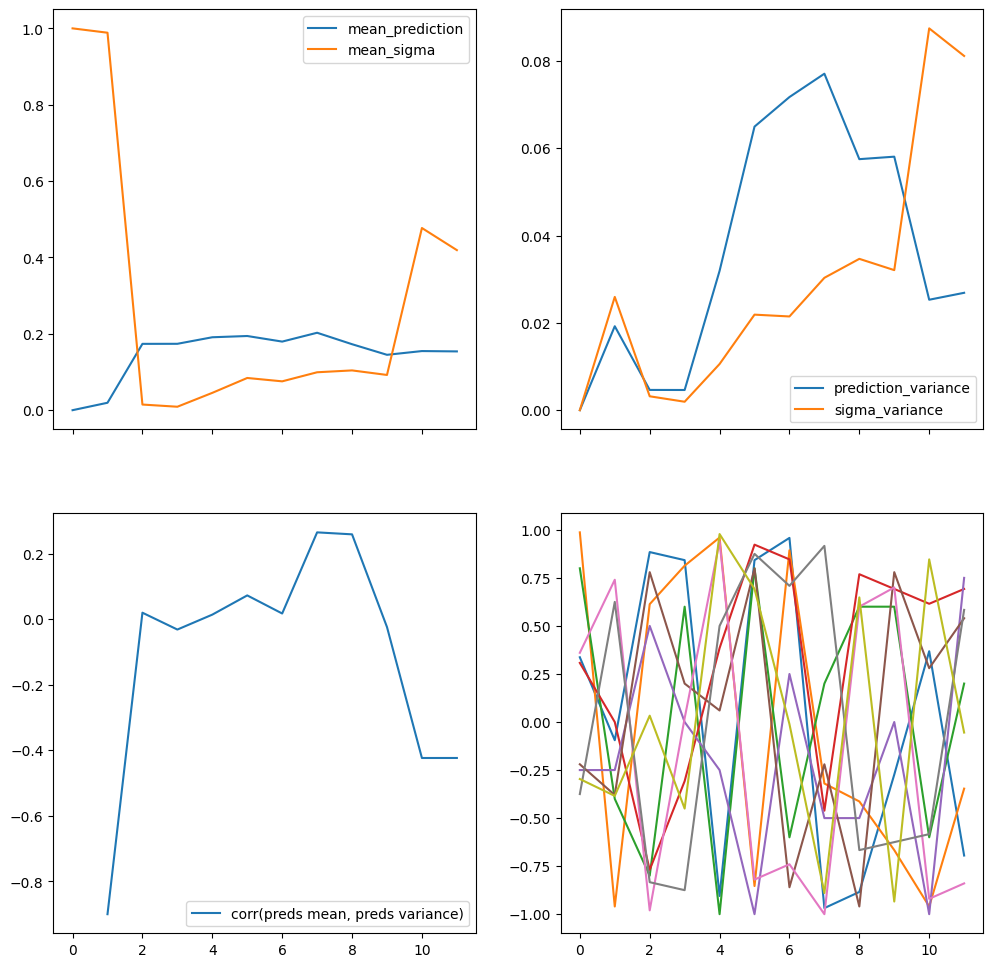

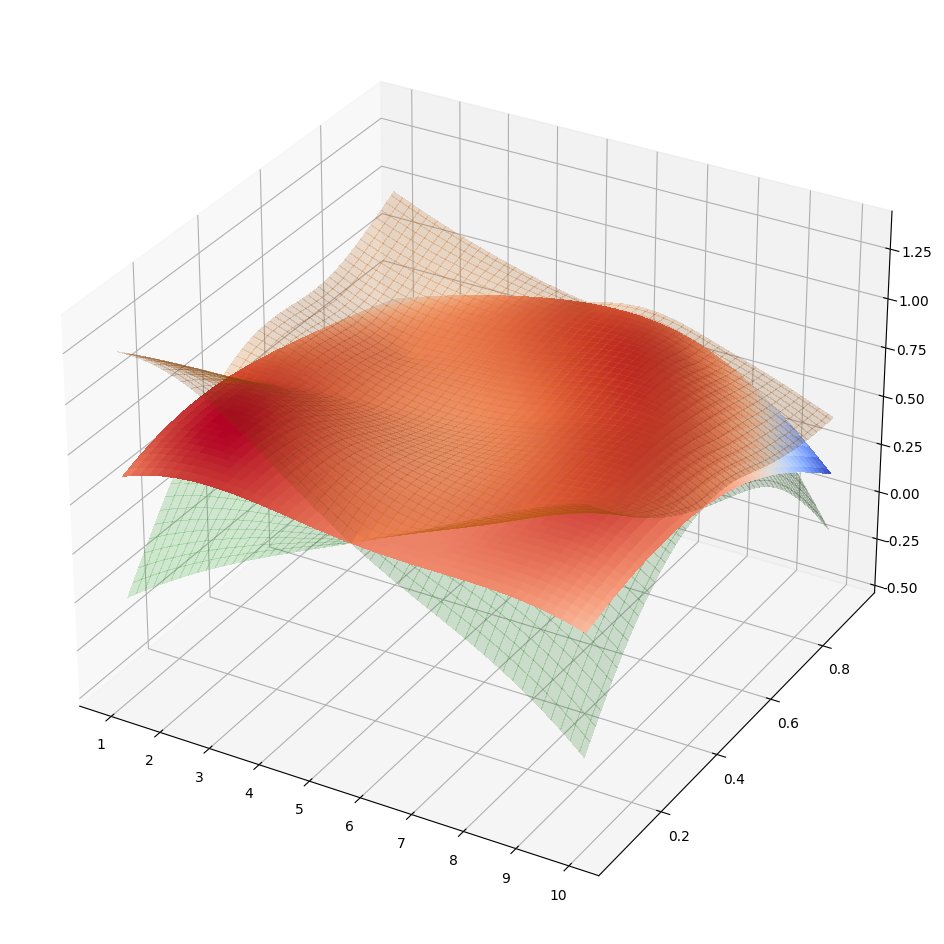

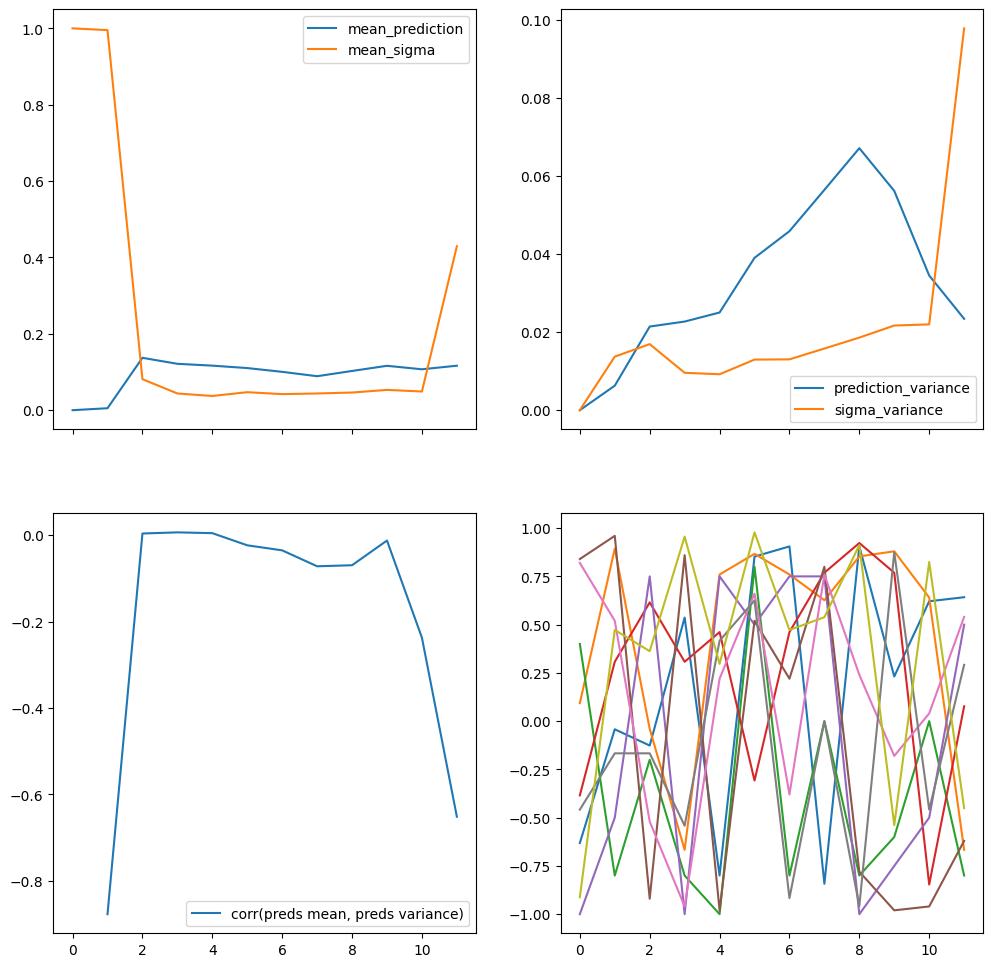

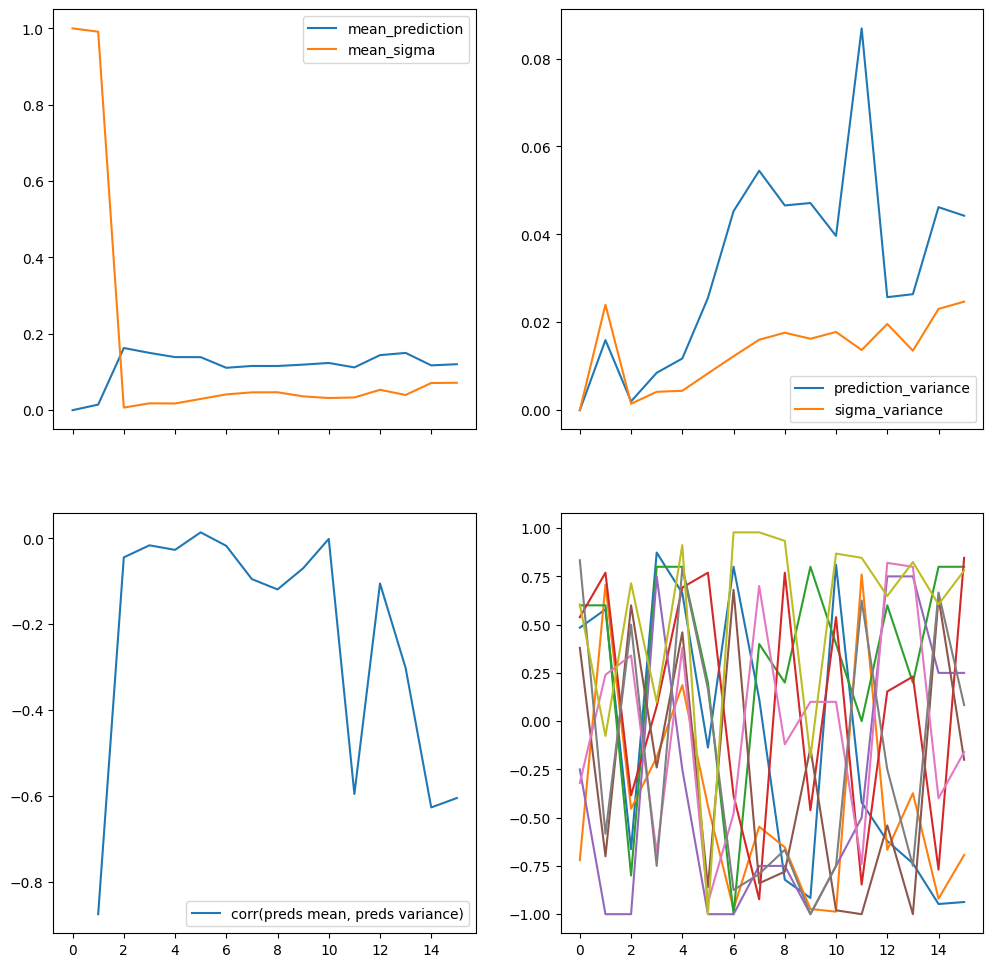

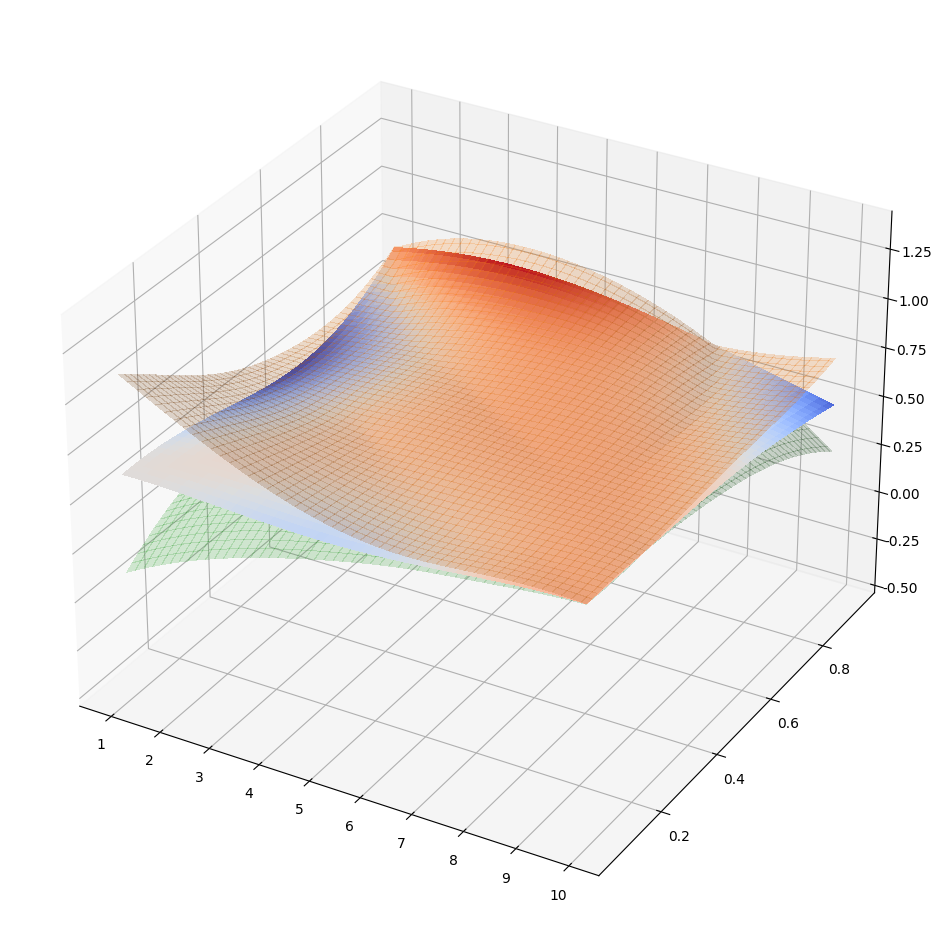

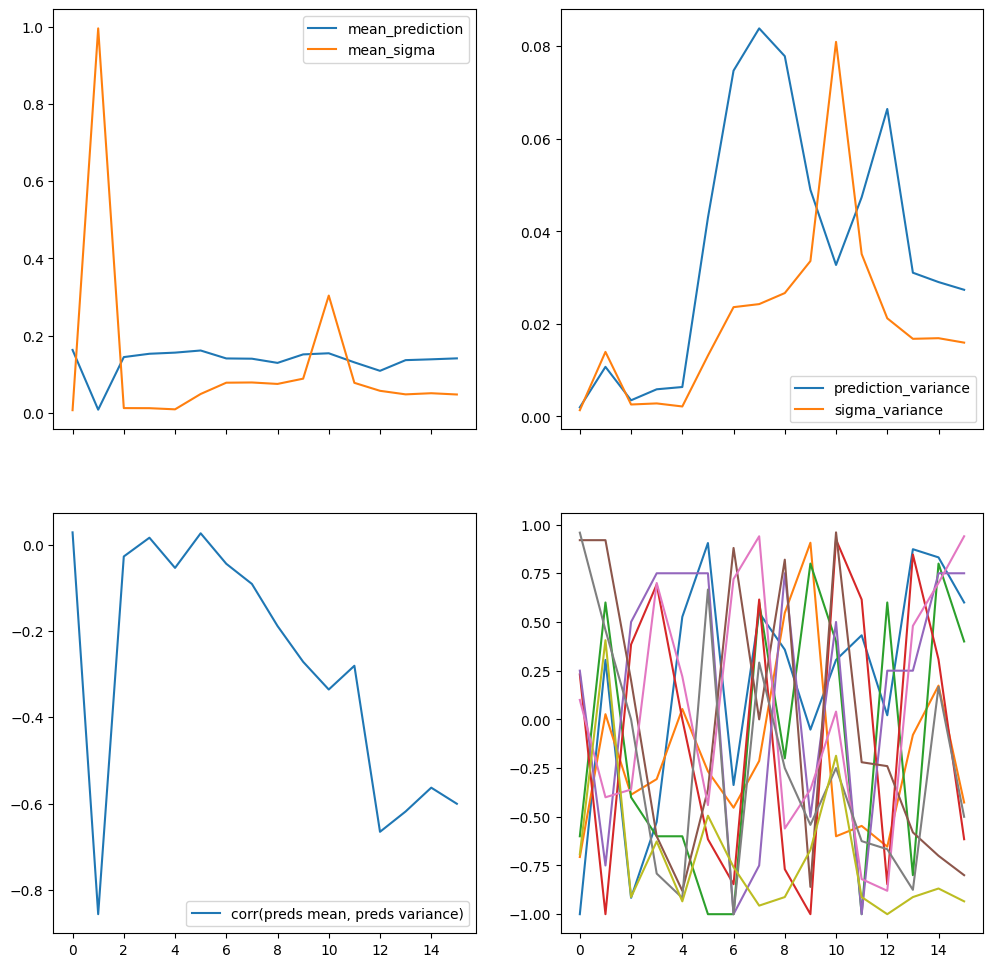

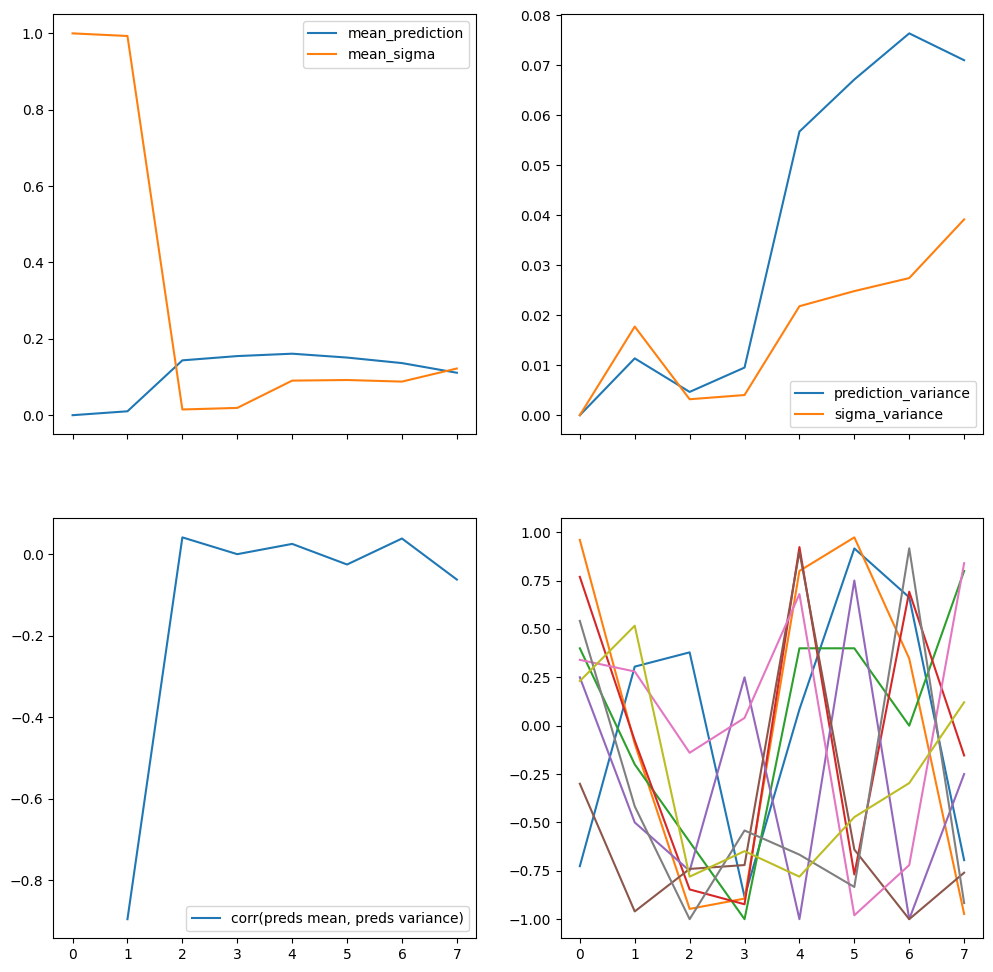

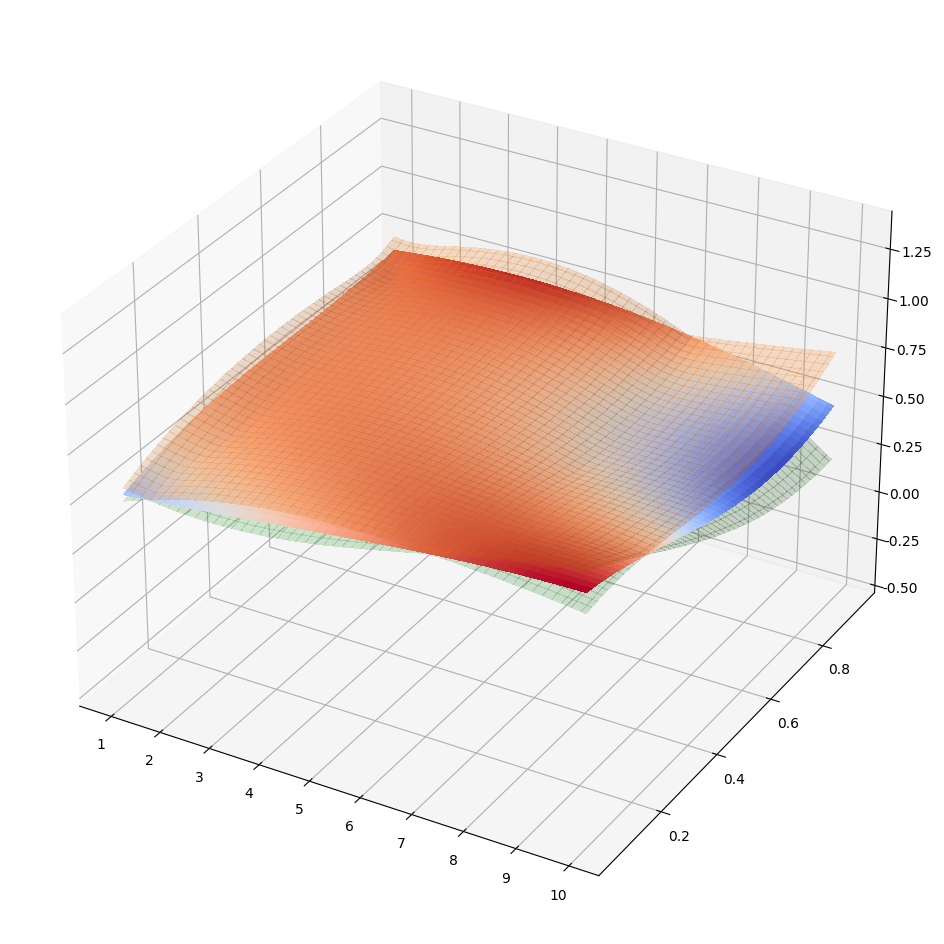

In [21]:
gec.save_figs("../data/figures/fig")

In [23]:
from sklearn.model_selection import RandomizedSearchCV
classifier = LGBMClassifier()
hyperparams = dict(gec.categorical_hyperparameters[:1] + gec.real_hyperparameters)
gs = RandomizedSearchCV(classifier, hyperparams, n_iter=64)
gs.fit(X_reweighted, y_reweighted)

[LightGBM] [Warning] lambda_l1 is set=0.2700521429238798, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2700521429238798
[LightGBM] [Warning] lambda_l2 is set=0.7100802259473088, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7100802259473088
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.3199999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3199999999999999
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l1 is set=0.2700521429238798, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2700521429238798
[LightGBM] [Warning] lambda_l2 is set=0.7100802259473088, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7100802259473088
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Cur

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.36986236456478433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36986236456478433
[LightGBM] [Warning] lambda_l2 is set=0.2975977524254038, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2975977524254038
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.43999999999999984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43999999999999984
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l1 is set=0.36986236456478433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36986236456478433
[LightGBM] [Warning] lambda_l2 is set=0.2975977524254038, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2975977524254038
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignore

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.06997231495784935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06997231495784935
[LightGBM] [Warning] lambda_l2 is set=0.4682231431110762, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4682231431110762
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9299999999999996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9299999999999996
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] lambda_l1 is set=0.06997231495784935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06997231495784935
[LightGBM] [Warning] lambda_l2 is set=0.4682231431110762, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4682231431110762
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored.

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.6547346782610776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6547346782610776
[LightGBM] [Warning] lambda_l2 is set=0.12827052111465376, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12827052111465376
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.6999999999999996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6999999999999996
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.6547346782610776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6547346782610776
[LightGBM] [Warning] lambda_l2 is set=0.12827052111465376, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12827052111465376
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored.

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check 

[LightGBM] [Warning] lambda_l1 is set=0.14556996667590663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14556996667590663
[LightGBM] [Warning] lambda_l2 is set=0.02909520922955782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02909520922955782
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.4199999999999998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4199999999999998
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] lambda_l1 is set=0.14556996667590663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14556996667590663
[LightGBM] [Warning] lambda_l2 is set=0.02909520922955782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02909520922955782
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be igno

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.18400975366074293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18400975366074293
[LightGBM] [Warning] lambda_l2 is set=0.7901453675440968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7901453675440968
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5399999999999998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5399999999999998
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] lambda_l1 is set=0.18400975366074293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18400975366074293
[LightGBM] [Warning] lambda_l2 is set=0.7901453675440968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7901453675440968
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored.

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.09230425336615203, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09230425336615203
[LightGBM] [Warning] lambda_l2 is set=0.12827052111465376, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12827052111465376
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7699999999999997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7699999999999997
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l1 is set=0.09230425336615203, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09230425336615203
[LightGBM] [Warning] lambda_l2 is set=0.12827052111465376, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12827052111465376
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be igno

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.6727558123020715, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6727558123020715
[LightGBM] [Warning] lambda_l2 is set=0.4418915071480124, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4418915071480124
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.6899999999999997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6899999999999997
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] lambda_l1 is set=0.6727558123020715, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6727558123020715
[LightGBM] [Warning] lambda_l2 is set=0.4418915071480124, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4418915071480124
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Cur

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.18400975366074293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18400975366074293
[LightGBM] [Warning] lambda_l2 is set=0.4167566846780885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4167566846780885
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.34999999999999987, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34999999999999987
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l1 is set=0.18400975366074293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18400975366074293
[LightGBM] [Warning] lambda_l2 is set=0.4167566846780885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4167566846780885
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignore

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.36986236456478433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36986236456478433
[LightGBM] [Warning] lambda_l2 is set=0.17722491237774848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17722491237774848
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.34999999999999987, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34999999999999987
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] lambda_l1 is set=0.36986236456478433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36986236456478433
[LightGBM] [Warning] lambda_l2 is set=0.17722491237774848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17722491237774848
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ig

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.16411959511019011, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16411959511019011
[LightGBM] [Warning] lambda_l2 is set=0.19806215580079167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19806215580079167
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5099999999999998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5099999999999998
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] lambda_l1 is set=0.16411959511019011, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16411959511019011
[LightGBM] [Warning] lambda_l2 is set=0.19806215580079167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19806215580079167
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignore

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check 

[LightGBM] [Warning] lambda_l1 is set=0.013702670330891934, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013702670330891934
[LightGBM] [Warning] lambda_l2 is set=0.06174179377005243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06174179377005243
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.13, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] lambda_l1 is set=0.013702670330891934, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013702670330891934
[LightGBM] [Warning] lambda_l2 is set=0.06174179377005243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06174179377005243
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boos

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.5247075177055799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5247075177055799
[LightGBM] [Warning] lambda_l2 is set=0.157792029421598, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.157792029421598
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.15999999999999998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15999999999999998
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l1 is set=0.5247075177055799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5247075177055799
[LightGBM] [Warning] lambda_l2 is set=0.157792029421598, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.157792029421598
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Curre

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[LightGBM] [Warning] lambda_l1 is set=0.8113528534799718, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8113528534799718
[LightGBM] [Warning] lambda_l2 is set=0.4818554701340344, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4818554701340344
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7599999999999997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7599999999999997
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] lambda_l1 is set=0.8113528534799718, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8113528534799718
[LightGBM] [Warning] lambda_l2 is set=0.4818554701340344, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4818554701340344
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Cur

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check 

[LightGBM] [Warning] lambda_l1 is set=0.17722491237774848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17722491237774848
[LightGBM] [Warning] lambda_l2 is set=0.02909520922955782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02909520922955782
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.32999999999999985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32999999999999985
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] lambda_l1 is set=0.17722491237774848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17722491237774848
[LightGBM] [Warning] lambda_l2 is set=0.02909520922955782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02909520922955782
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ig

/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
85 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/lightgbm/sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/ligh

[LightGBM] [Warning] lambda_l1 is set=0.45490422386848667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.45490422386848667
[LightGBM] [Warning] lambda_l2 is set=0.2527276847641921, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2527276847641921
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.20999999999999996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20999999999999996
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


RandomizedSearchCV(estimator=LGBMClassifier(), n_iter=64,
                   param_distributions={'boosting': ['gbdt', 'dart', 'rf'],
                                        'feature_fraction': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [24]:
X_eval, y_eval = X_reweighted, y_reweighted
knn_bayes = LGBMClassifier(**gec.best_params_)
score_bayes = np.mean(cross_val_score(knn_bayes, X_eval, y_eval, cv=5))
knn_gs = LGBMClassifier(**gs.best_params_)
score_gs = np.mean(cross_val_score(knn_gs, X_eval, y_eval, cv=5))
knn_default = LGBMClassifier()
score_default = np.mean(cross_val_score(knn_default, X_eval, y_eval, cv=5))
print(f"bayesian: {score_bayes}, random search: {score_gs}, default: {score_default}")


[LightGBM] [Warning] feature_fraction is set=0.13, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] lambda_l2 is set=0.3480013777905931, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3480013777905931
[LightGBM] [Warning] lambda_l1 is set=0.016639666155303975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016639666155303975
[LightGBM] [Warning] feature_fraction is set=0.13, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] 